# Running HDAE for OPOSUM and Restaurant Review Dataset

After running the following code, all the information of evaluation for each epoch will be store in `Results` folder, including `F1 score`, `bar plot`, and `TSNE plot` shown in our paper.

In [1]:
""" Global Setting """
import os 
from config import get_hparams

!export PYTHONPATH="./"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

from config import get_hparams

# BOOTS, BAGS_AND_CASES, TV, KEYBOARDS, VACUUMS, BLUETOOTH
# "REST_" + "EN" | "SP" | "FR" | "RU" | "DU" | "TU"
DATASET = "KEYBOARDS"
locals().update(get_hparams(DATASET))

sumout = f"./Results/{DATASET}/"
aspect_seeds = f"./data/seedwords/{SEEDS}.{aspects}-weights.txt"
aspect_init_file = f"./data/seedwords/{SEEDS}.{aspects}.txt"
train_type = "rec_mt_neva_tsne"
student_type = "hyper_rec_dis_10_gbl_tsne"

command = f"python3 ./main.py --sumout {sumout} \
                              --aspect_seeds {aspect_seeds} \
                              --aspect_init_file {aspect_init_file} \
                              --general_asp {general_asp} \
                              --dataset {DATASET} \
                              --train_type {train_type} --student_type {student_type} \
                              --lr {lr} \
                              --dis_mu {dis_mu} \
                              --hyper_beta {hyper_beta} \
                              --gb_temp {gb_temp} \
                              --w2v_ratio {w2v_ratio} \
                              --st_num_aspect {st_num_aspect} \
                              --mt_ratio {mt_ratio} \
                              --dis_1 {dis_1} --dis_2 {dis_2} --dis_3 {dis_3} \
                              --aspect_tsne_bt {aspect_tsne_bt}"

dataset =  KEYBOARDS


In [ ]:
""" Running HDAE """
print("Running Command:")
print(' '.join(command.split()))

!{command}

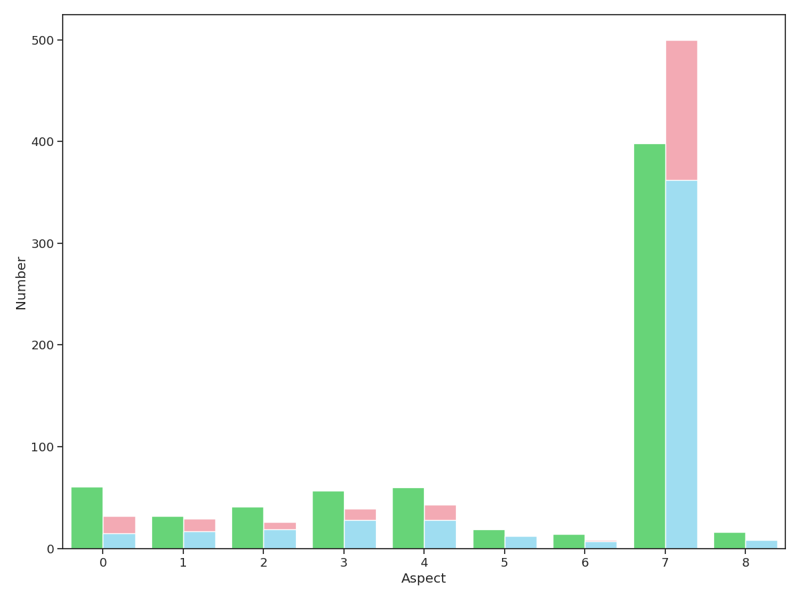

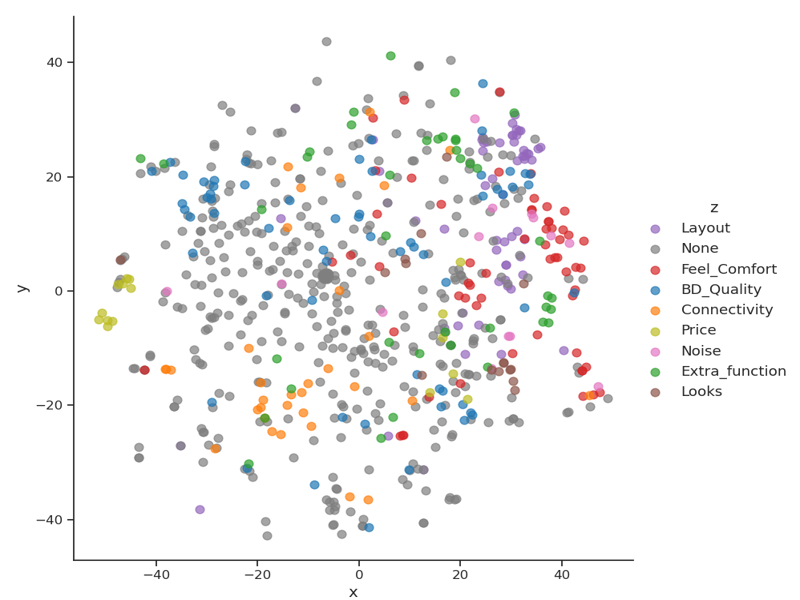

In [3]:
""" Show Results """
from PIL import Image

best_epoch = 1 # manually select

display(Image.open(f"{sumout}plot_fig{best_epoch}.png").resize((800, 600)))
display(Image.open(f"{sumout}TSNE_type_fig{best_epoch}.png").resize((800, 600)))